In [1]:
import pandas as pd
import re

Data and some clensing methods : 




    Data: 
    https://data.boston.gov/dataset/climate-ready-boston-social-vulnerability/resource/3d506197-74e9-4032-a455-fe231ea9daf1
    https://data.boston.gov/dataset/building-and-property-violations1?utm_source=chatgpt.com
    https://data.boston.gov/dataset/property-assessment/resource/6b7e460e-33f6-4e61-80bc-1bef2e73ac54




    Data Cleaning: 

    lots of spelling mistakes so had to correct data before merging
    in the districts_df there were a lot of duplicates of the same violation so went in and removed them
    Just in case the merging did not work we also double check and only found 22 unmatched examples so we are good as 22/15000 is a very small unmatched rate
    There were a lot of merging errror so I had to truncate the big files to look at the headers and came up with a 
    new feature that can compare addresses and merge with high success rate. We got around 90% merge collision which is pretty good for data 
    sets collected from different places 
     



In [4]:
# Load data and clean up
violations_df = pd.read_csv("./violations.csv")  # replace with your filename
demographics_df = pd.read_csv("./demographics.csv")  # your social vulnerability dataset
landlord_df = pd.read_csv("../landlord.csv")  # landlords data


demographics_df['Name'] = demographics_df['Name'].str.strip().str.lower()
violations_df['violation_city'] = violations_df['violation_city'].str.strip().str.lower()

print(demographics_df['Name'].unique())
print(violations_df['violation_city'].unique())



['mission hill' 'fenway' 'back bay' 'allston' 'brighton' 'jamaica plain'
 'roslindale' 'hyde park' 'west roxbury' 'mattapan' 'dorchester'
 'east boston' 'north end' 'west end' 'longwood medical area' 'roxbury'
 'south boston waterfront' 'charlestown' 'south end' 'bay village'
 'leather district' 'south boston' 'harbor islands']
['east boston' 'dorchester' 'boston' 'roxbury' 'brighton' 'hyde park'
 'charlestown' 'allston' 'west roxbury' 'mattapan' 'south boston'
 'jamaica plain' 'roslindale' 'mission hill' 'south end'
 'theater district' '' 'charlestown/' 'financial district' 'east boston/'
 'allston/boston' 'roxbury crossin' 'dorchester/' 'chestnut hill'
 'dorchester center' 'financial district/' 'roslindale/' 'northend/'
 'jamaica plain/' 'northend' 'mattapan/' 'west roxbury/' 'roxbury/'
 'charlestown666' 'brighton/' 'dorchester (lower mills)' 'west end'
 'hyde park/' 'kenmore/fenway' 'mission hill/' 'chinatown'
 'boston/west end' 'fenway/' 'east boston//' 'back bay/']


/var/folders/vt/h6zk5t3106dgbrm4lvpjm5x40000gn/T/ipykernel_7769/794855852.py:4: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  landlord_df = pd.read_csv("../landlord.csv")  # landlords data


In [5]:
# Cleaning the data : there are some typos

def clean_violation_city(city):
    if pd.isna(city) or city.strip() == '':
        return None
    city = city.lower().strip()
    
    # Fix common slashes
    city = city.replace('/', '')
    
    if 'boston' in city and city != 'boston':
        return 'boston'
    if 'east boston' in city:
        return 'east boston'
    if 'brighton' in city:
        return 'brighton'
    if 'allston' in city:
        return 'allston'
    if 'fenway' in city or 'kenmore' in city:
        return 'fenway'
    if 'back bay' in city:
        return 'back bay'
    if 'south end' in city or 'bay village' in city:
        return 'south end'
    if 'north end' in city or 'northend' in city:
        return 'north end'
    if 'roxbury' in city:
        return 'roxbury'
    if 'dorchester' in city:
        return 'dorchester'
    if 'hyde park' in city:
        return 'hyde park'
    if 'jamaica plain' in city:
        return 'jamaica plain'
    if 'roslindale' in city:
        return 'roslindale'
    if 'mattapan' in city:
        return 'mattapan'
    if 'west roxbury' in city:
        return 'west roxbury'
    if 'charlestown' in city:
        return 'charlestown'
    if 'south boston' in city:
        return 'south boston'
    if 'theater district' in city or 'financial district' in city or 'chinatown' in city or 'chestnut hill' in city:
        return 'boston'  # These are Boston neighborhoods
    return city
def clean_demographics_name(name):
    if pd.isna(name):
        return None
    name = name.lower().strip()
    name = name.replace('/', '')
    if 'dorchester' in name:
        return 'dorchester'
    if 'brighton' in name:
        return 'brighton'
    if 'roxbury' in name:
        return 'roxbury'
    if 'jamaica plain' in name:
        return 'jamaica plain'
    if 'hyde park' in name:
        return 'hyde park'
    if 'south boston' in name:
        return 'south boston'
    if 'east boston' in name:
        return 'east boston'
    if 'allston' in name:
        return 'allston'
    if 'fenway' in name:
        return 'fenway'
    if 'back bay' in name:
        return 'back bay'
    if 'north end' in name:
        return 'north end'
    if 'west end' in name:
        return 'west end'
    if 'charlestown' in name:
        return 'charlestown'
    if 'south end' in name or 'bay village' in name or 'leather district' in name:
        return 'south end'
    if 'mission hill' in name:
        return 'mission hill'
    if 'west roxbury' in name:
        return 'west roxbury'
    if 'roslindale' in name:
        return 'roslindale'
    if 'mattapan' in name:
        return 'mattapan'
    if 'longwood medical area' in name:
        return 'boston'
    if 'harbor islands' in name:
        return 'boston'
    return name
# Clearn data: 
violations_df['cleaned_city'] = violations_df['violation_city'].apply(clean_violation_city)
demographics_df['cleaned_name'] = demographics_df['Name'].apply(clean_demographics_name)
demographics_df = demographics_df.drop_duplicates(subset=['cleaned_name'])

# Double check:
print(violations_df['cleaned_city'].unique())

['boston' 'dorchester' 'roxbury' 'brighton' 'hyde park' 'charlestown'
 'allston' 'mattapan' 'jamaica plain' 'roslindale' 'mission hill'
 'south end' None 'north end' 'west end' 'fenway' 'back bay']


In [6]:
# lets join the two datasets: 
merged_df = violations_df.merge(
    demographics_df,
    left_on='cleaned_city',
    right_on='cleaned_name',
    how='left'
)

# Preview the merged dataset
print(merged_df.head())
# Save for further analysis
merged_df.to_csv("violations_with_demographics.csv", index=False)


   case_no  ap_case_defn_key          status_dttm  status    code  value  \
0   V91983              1013                  NaN  Closed   121.2    NaN   
1  V830092              1013  2025-04-24 14:18:51    Open   107.4    NaN   
2  V830088              1013  2025-04-24 14:08:51    Open   107.4    NaN   
3  V830084              1013  2025-04-24 13:43:55    Open  5110.1    NaN   
4  V830081              1013  2025-04-24 13:34:03    Open   107.4    NaN   

                      description violation_stno violation_sthigh  \
0            Unsafe and Dangerous            302              NaN   
1  Failed to comply w permit term             32              NaN   
2  Failed to comply w permit term             32              NaN   
3        Failure to secure permit            259              NaN   
4  Failed to comply w permit term            110              NaN   

  violation_street  ... TotChild OlderAdult Low_to_No     LEP    POC2  \
0           Sumner  ...    118.0       11.0     186.0  

In [7]:
# check for some errors 
# Check if there are any violations that did not match to a demographic neighborhood
unmatched = merged_df[merged_df['Name'].isna()]
print(f"There are {len(unmatched)} unmatched violations.")
if len(unmatched) > 0:
    print(unmatched[['case_no', 'violation_city', 'cleaned_city']])

There are 22 unmatched violations.
       case_no violation_city cleaned_city
1703   V664903                        None
1704   V664887                        None
5470   V402880                        None
6653   V332836                        None
7777   V275213                        None
8146   V263191                        None
9091   V222207                        None
9162   V229102                        None
9334   V224691                        None
9461   V218064                        None
10380  V185887                        None
12670  V138851                        None
13031  V130811                        None
13313  V125519                        None
13891  V115895                        None
14410  V105358                        None
14425  V104929                        None
15703   V76041                        None
16141   V65453                        None
16168   V65108                        None
16169   V65107                        None
16337   V62931     

In [9]:
import pandas as pd
import re

# Function to clean text (lowercase, remove spaces, remove dots)
def clean_text(s):
    if pd.isna(s):
        return ''
    s = str(s).lower()
    s = re.sub(r'\s+', '', s)  # remove all spaces
    s = s.replace('.', '')     # remove dots
    return s

# Function to clean number fields (like ZIP or ST_NUM) to remove .0
def clean_number(n):
    if pd.isna(n):
        return ''
    try:
        n = int(float(n))  # Convert float -> int safely
    except ValueError:
        return str(n)
    return str(n)

# Function to clean violation zip specifically (remove leading zeros)
def clean_violation_zip(z):
    if pd.isna(z):
        return ''
    z = str(z)
    z = z.lstrip('0')  # remove leading zeros
    return z

# 1. Load landlord.csv
landlord_df = pd.read_csv('../landlord.csv')  # adjust path if needed

# 2. Build compare_address for landlord_df
landlord_df['compare_address'] = (
    landlord_df['ST_NUM'].apply(clean_number).apply(clean_text) +
    landlord_df['ST_NAME'].fillna('').apply(clean_text) +
    landlord_df['ZIP_CODE'].apply(clean_number).apply(clean_text)
)

# 3. Load violations_with_demographics.csv
violations_df = pd.read_csv('./violations_with_demographics.csv')  # adjust path if needed

# 4. Build compare_address for violations_df
violations_df['compare_address'] = (
    violations_df['violation_stno'].apply(clean_number).apply(clean_text) +
    violations_df['violation_street'].fillna('').apply(clean_text) +
    violations_df['violation_suffix'].fillna('').apply(clean_text) +
    violations_df['violation_zip'].fillna('').apply(clean_violation_zip).apply(clean_text)
)

# 5. Quick sanity check
print("Landlord data (after processing):")
print(landlord_df[['ST_NUM', 'ST_NAME', 'ZIP_CODE', 'compare_address']].head())

print("\nViolations data (after processing):")
print(violations_df[['violation_stno', 'violation_street', 'violation_suffix', 'violation_zip', 'compare_address']].head())

/var/folders/vt/h6zk5t3106dgbrm4lvpjm5x40000gn/T/ipykernel_7769/3537331982.py:32: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  landlord_df = pd.read_csv('../landlord.csv')  # adjust path if needed


Landlord data (after processing):
   ST_NUM       ST_NAME  ZIP_CODE     compare_address
0   104.0     PUTNAM ST    2128.0     104putnamst2128
1   197.0  Lexington ST    2128.0  197lexingtonst2128
2   199.0  Lexington ST    2128.0  199lexingtonst2128
3   201.0  Lexington ST    2128.0  201lexingtonst2128
4   203.0  Lexington ST    2128.0  203lexingtonst2128

Violations data (after processing):
  violation_stno violation_street violation_suffix violation_zip  \
0            302           Sumner               ST         02128   
1             32          Norwood               ST         02122   
2             32          Norwood               ST         02122   
3            259           Quincy               ST         02121   
4            110    Saint Botolph               ST         02115   

         compare_address  
0        302sumnerst2128  
1        32norwoodst2122  
2        32norwoodst2122  
3        259quincyst2121  
4  110saintbotolphst2115  


/var/folders/vt/h6zk5t3106dgbrm4lvpjm5x40000gn/T/ipykernel_7769/3537331982.py:42: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  violations_df = pd.read_csv('./violations_with_demographics.csv')  # adjust path if needed


In [10]:
# Merge on the cleaned compare_address
merged_df = violations_df.merge(
    landlord_df[['compare_address', 'OWNER']],  # Only need compare_address and owner
    on='compare_address',
    how='left'  # keep all violations, even if no landlord match
)

# Save to CSV
merged_df.to_csv('lordsviolation.csv', index=False)

# Confirm success
print(f"✅ Successfully merged {len(merged_df)} rows!")
print(f"Total violations: {len(merged_df)}")
print(f"Violations with OWNER matched: {merged_df['OWNER'].notna().sum()}")
print(f"Match percentage: {merged_df['OWNER'].notna().mean() * 100:.2f}%")

✅ Successfully merged 37450 rows!
Total violations: 37450
Violations with OWNER matched: 33763
Match percentage: 90.15%


# Data has been now cleaed we will now work with lordsviolations.csv


In [11]:
import pandas as pd

# Step 1: Load the merged dataset
df = pd.read_csv('lordsviolation.csv')

# Step 2: Drop rows without owner information
df = df[df['OWNER'].notna()]

# Step 3: Group violations by landlord and violation description
violation_counts = df.groupby(['OWNER', 'description']).size().reset_index(name='count')

# Step 4: Also get severity by looking at violation code distribution per owner
# (Assuming higher codes may indicate more severe violations)
violation_stats = df.groupby('OWNER').agg({
    'case_no': 'count',
    'code': ['nunique', 'min', 'max']
}).reset_index()

violation_stats.columns = ['OWNER', 'total_violations', 'unique_violation_types', 'min_code', 'max_code']

# Step 5: Merge both for a richer picture
landlord_summary = pd.merge(violation_stats, violation_counts, on='OWNER', how='left')

# Step 6: Sort by total violations to see worst offenders
worst_landlords = landlord_summary.sort_values(by='total_violations', ascending=False)

# Display top 10
print(worst_landlords.head(10))

# Optional: Save to CSV for reporting
worst_landlords.to_csv('worst_landlords_violation_summary.csv', index=False)

                                   OWNER  total_violations  \
10722               HISTORIC RIVIERA LLC               150   
10723               HISTORIC RIVIERA LLC               150   
19873                    SANIEOFF KHORSO                70   
19872                    SANIEOFF KHORSO                70   
19871                    SANIEOFF KHORSO                70   
19870                    SANIEOFF KHORSO                70   
15883          MOTHER BROOK LLC MASS LLC                50   
15884          MOTHER BROOK LLC MASS LLC                50   
15882          MOTHER BROOK LLC MASS LLC                50   
23520  WALANDO HOMES LIMITED PARTNERSHIP                47   

       unique_violation_types  min_code max_code  \
10722                       2   105.1.1    116.2   
10723                       2   105.1.1    116.2   
19873                       5  1001.3.2    121.1   
19872                       5  1001.3.2    121.1   
19871                       5  1001.3.2    121.1   
19870

# Visualizations

In [12]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv("lordsviolation.csv")

# Summarize by landlord and violation type
summary = (
    df.groupby(['OWNER', 'description'])
    .size()
    .reset_index(name='count')
)

# Add total violations per landlord for filtering later
summary['total_violations'] = summary.groupby('OWNER')['count'].transform('sum')

# Save for future plotting
summary.to_csv("worst_landlords_violation_summary.csv", index=False)

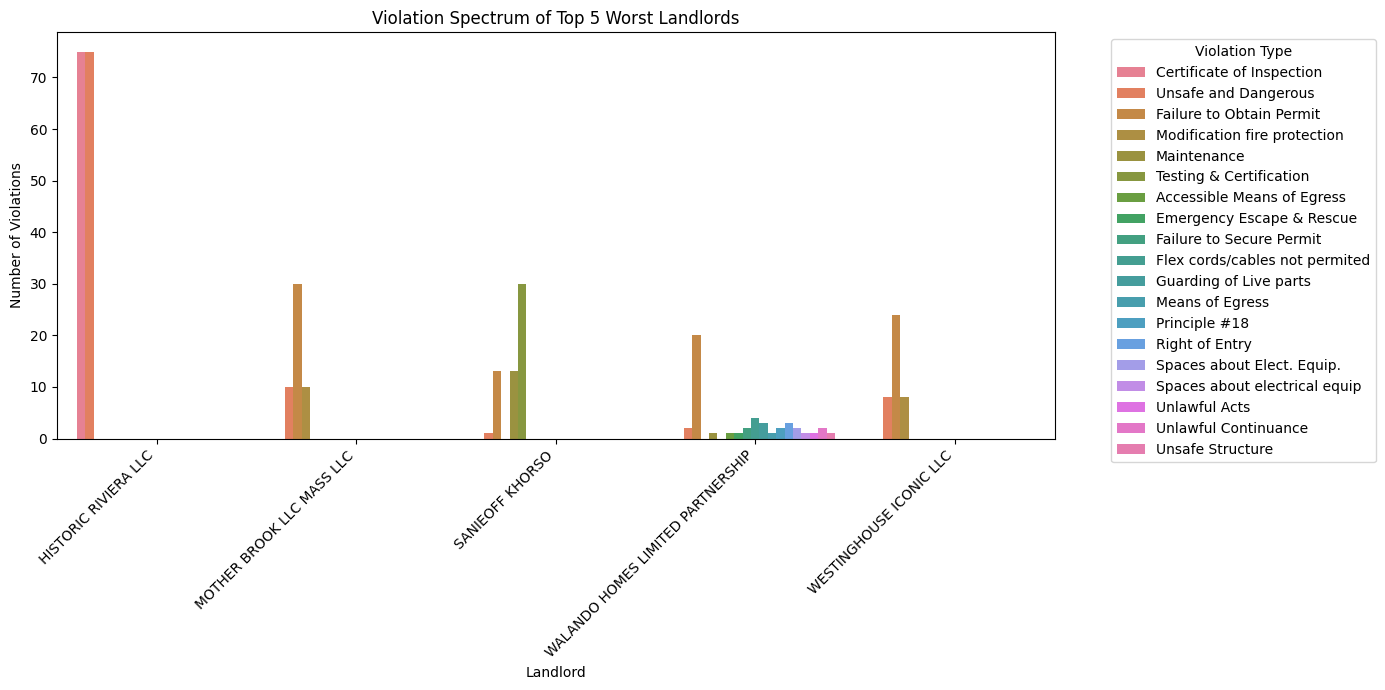

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

summary_df = pd.read_csv("worst_landlords_violation_summary.csv")

# Top 5 worst landlords by total violations
top_landlords = (
    summary_df.groupby("OWNER")["total_violations"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

top_summary = summary_df[summary_df["OWNER"].isin(top_landlords)]

plt.figure(figsize=(14, 7))
sns.barplot(data=top_summary, x="OWNER", y="count", hue="description")
plt.title("Violation Spectrum of Top 5 Worst Landlords")
plt.xlabel("Landlord")
plt.ylabel("Number of Violations")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Violation Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Some learning algorithms: 

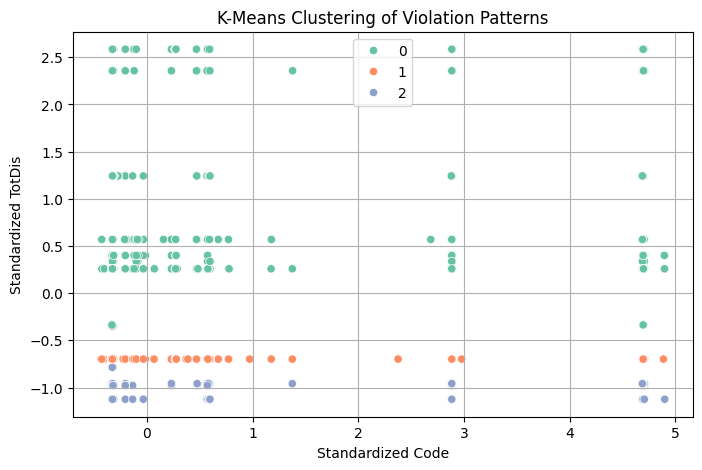

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("lordsviolation.csv")

# Convert 'code' to numeric, forcing non-convertible values to NaN
df['code'] = pd.to_numeric(df['code'], errors='coerce')

# Select relevant features
features = ['code', 'TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2', 'MedIllnes']
X = df[features].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df.loc[X.index, 'cluster'] = cluster_labels  # only assign to rows we used

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette='Set2')
plt.title("K-Means Clustering of Violation Patterns")
plt.xlabel("Standardized Code")
plt.ylabel("Standardized TotDis")
plt.grid(True)
plt.show()

In [15]:
# Logistic Regression: Predicting if a landlord is a repeat offender

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Binary label: worst landlords = those with >= 5 violations
violation_counts = df.groupby('OWNER').size().reset_index(name='violation_count')
df = df.merge(violation_counts, on='OWNER', how='left')
df['worst_landlord'] = (df['violation_count'] >= 5).astype(int)

# Model data
features = ['code', 'TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2', 'MedIllnes']
X = df[features].fillna(0)
y = df['worst_landlord']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      5629
           1       0.57      0.13      0.21      1861

    accuracy                           0.76      7490
   macro avg       0.67      0.55      0.53      7490
weighted avg       0.72      0.76      0.70      7490

